<a href="https://colab.research.google.com/github/Alyssasorensen/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Homework Assignment: Introduction to Databases with SQLite



## 1. Data Exploration and Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/sqlite_database_operations/main/datasets/113243405_StonyBrookUniversityHospital_standardcharges.csv')

In [18]:
print("Dataset 1 Overview:")
print(df1.head())

Dataset 1 Overview:
    Code                                        Description        Type  \
0  10004  FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...  Outpatient   
1  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
2  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
3  10006  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
4  10009  FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...  Outpatient   

  Package/Line_Level  Gross charge  Discounted cash price  \
0               Line        718.67                 718.67   
1               Line       2061.25                2061.25   
2            Package       2061.25                2061.25   
3               Line        728.54                 728.54   
4               Line       2823.01                2823.01   

   De-identified min contracted rate  De-identified max contracted rate  \
0                            2155.50                            2155.50   
1           

In [19]:
print("Summary Statistics for Dataset 1:")
print(df1.describe())

Summary Statistics for Dataset 1:
       Gross charge  Discounted cash price  De-identified min contracted rate  \
count  7.710000e+03           7.710000e+03                        6254.000000   
mean   2.274832e+04           2.274832e+04                        4090.693876   
std    7.470570e+04           7.470570e+04                       10576.213503   
min    3.000000e-02           3.000000e-02                           0.010000   
25%    1.065895e+03           1.065895e+03                          96.520000   
50%    4.745295e+03           4.745295e+03                        1108.860000   
75%    1.103881e+04           1.103881e+04                        4309.532500   
max    1.857952e+06           1.857952e+06                      327869.690000   

       De-identified max contracted rate  Derived contracted rate  \
count                       6.254000e+03              6254.000000   
mean                        1.003579e+04              6315.587725   
std                         2

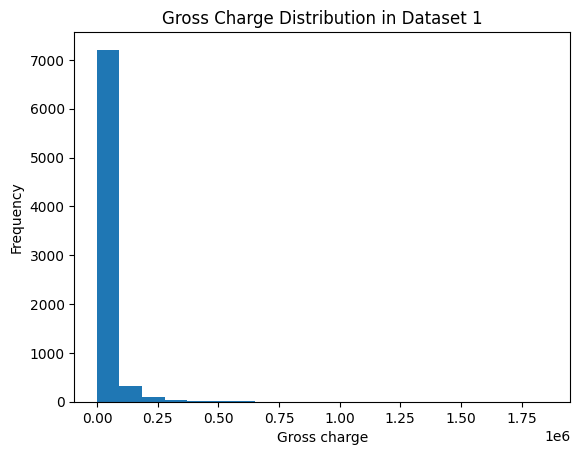

In [22]:
# Example histogram for a numerical column 'Gross charge' in Dataset 1
plt.hist(df1['Gross charge'], bins=20)
plt.xlabel('Gross charge')
plt.ylabel('Frequency')
plt.title('Gross Charge Distribution in Dataset 1')
plt.show()

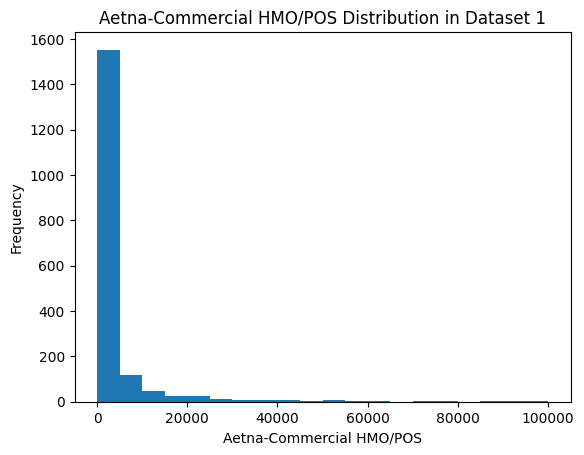

In [23]:
# Another example histogram for a numerical column 'Aetna-Commercial HMO/POS' in Dataset 1
plt.hist(df1['Aetna-Commercial HMO/POS'], bins=20)
plt.xlabel('Aetna-Commercial HMO/POS')
plt.ylabel('Frequency')
plt.title('Aetna-Commercial HMO/POS Distribution in Dataset 1')
plt.show()

In [24]:
print("Missing Values in Dataset 1:")
print(df1.isnull().sum())

Missing Values in Dataset 1:
Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Co

In [25]:
# Example: Frequency counts for a categorical column 'Description' in Dataset 1
print("Frequency Counts for 'Description' in Dataset 1:")
print(df1['Description'].value_counts())

Frequency Counts for 'Description' in Dataset 1:
R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                               

## 2. SQLite Database Operations:

In [26]:
import sqlite3

# Create or connect to the SQLite database
conn = sqlite3.connect('health.db')

In [27]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Create a table
create_table_query = '''
CREATE TABLE IF NOT EXISTS patient_data (
    patient_id INTEGER PRIMARY KEY,
    patient_name TEXT,
    age INTEGER,
    gender TEXT,
    diagnosis TEXT
);
'''
cursor.execute(create_table_query)

# Insert sample data
insert_data_query = '''
INSERT INTO patient_data (patient_name, age, gender, diagnosis)
VALUES
    ('Bob Sun', 65, 'Male', 'Hypertension'),
    ('Nina Smith', 32, 'Female', 'Diabetes');
'''
cursor.execute(insert_data_query)

# Commit the changes to the database
conn.commit()
